In [136]:
import pymysql
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, Model
from keras.layers import Dense, LSTM, Dropout

In [137]:
_host = '168.131.39.95'
_port = 3306
_user = 'root'
_passwd = 'jslab0963'
_db = 'TYP'
db = pymysql.connect(host=_host, port=_port, user=_user, passwd=_passwd, db=_db, charset= 'utf8')
cursor = db.cursor()
typ_name = ['CHABA2', 'CHANHOM', 'GONI', 'HALOLA', 'HALONG', 'KONGREY2', 'MALAKAS', 'NAKRI2', 'NANGKA', 'NANMADOL', 'NEOGURI',
           'NORU', 'PRAPIROON', 'RUMBIA', 'SOULIK', 'TALIM', 'TRAMI', 'VONGFONG']

In [138]:
typ_lang = []
typ_long = []
WD = []
WV = []
WT = []

In [139]:
temp = []
for name in typ_name:
    sql = " SELECT * from " + name
    cursor.execute(sql)
    result = cursor.fetchall()
    for row_data in result:
        typ_lang.append([row_data[1], row_data[2]])
        temp.append([row_data[3], row_data[4], row_data[5]])

print(temp)
print(typ_lang)

[[110, Decimal('26.000'), Decimal('29.000')], [115, Decimal('29.000'), Decimal('29.400')], [135, Decimal('29.000'), Decimal('29.400')], [145, Decimal('23.000'), Decimal('29.500')], [145, Decimal('26.000'), Decimal('29.500')], [150, Decimal('27.000'), Decimal('29.500')], [160, Decimal('27.000'), Decimal('29.500')], [175, Decimal('26.000'), Decimal('29.100')], [145, Decimal('30.000'), Decimal('29.500')], [190, Decimal('25.000'), Decimal('28.700')], [165, Decimal('25.000'), Decimal('28.600')], [165, Decimal('27.000'), Decimal('29.000')], [170, Decimal('35.000'), Decimal('29.400')], [170, Decimal('44.000'), Decimal('28.700')], [190, Decimal('56.000'), Decimal('28.900')], [215, Decimal('61.000'), Decimal('28.600')], [210, Decimal('56.000'), Decimal('28.900')], [215, Decimal('57.000'), Decimal('29.200')], [205, Decimal('55.000'), Decimal('29.000')], [205, Decimal('52.000'), Decimal('29.200')], [185, Decimal('50.000'), Decimal('29.100')], [205, Decimal('56.000'), Decimal('29.100')], [200, Dec

In [140]:
temp = np.asarray(temp, dtype = np.float32)
scaler = MinMaxScaler(feature_range=(0., 1.))
temp = scaler.fit_transform(temp)
print(len(temp))
print(temp)

x_train = temp[0:260]
x_val = temp[260:520]
x_test = temp[520:784]

typ_lang = np.asarray(typ_lang, dtype = np.float32)
print(len(typ_lang))
print(typ_lang)
y_train = typ_lang[0:260]
y_val = typ_lang[260:520]
y_test = typ_lang[520:784]

784
[[0.2857143  0.13872832 0.84939766]
 [0.3        0.15606935 0.8734939 ]
 [0.35714287 0.15606935 0.8734939 ]
 ...
 [0.87142855 0.11560693 0.        ]
 [0.85714287 0.15606935 0.01807231]
 [0.9        0.29479766 0.03614461]]
784
[[ 15.8 158.1]
 [ 15.6 156.4]
 [ 15.2 154.6]
 ...
 [ 34.5 135.6]
 [ 36.7 139.5]
 [ 39.6 143.2]]


In [141]:
db.close()

In [142]:
print(len(typ_lang))
print(len(temp))

784
784


In [143]:
# 데이터셋 전처리
x_train = np.reshape(x_train, (-1, 3, 1))
x_val = np.reshape(x_val, (-1, 3, 1))
x_test = np.reshape(x_test, (-1, 3, 1))

In [144]:
y_train = np.reshape(y_train, (-1, 2))
y_val = np.reshape(y_train, (-1, 2))
y_test = np.reshape(y_test, (-1, 2))

In [145]:
print(x_train.shape)
print(y_train.shape)

(260, 3, 1)
(260, 2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 260)               272480    
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 522       
Total params: 273,002
Trainable params: 273,002
Non-trainable params: 0
_________________________________________________________________
None
Train on 208 samples, validate on 52 samples
Epoch 1/1000
208/208 [==============================] - 3s 13ms/step - loss: 9816.8445 - val_loss: 7970.6138
Epoch 2/1000
208/208 [==============================] - 0s 2ms/step - loss: 6466.7158 - val_loss: 4517.6129
Epoch 3/1000
208/208 [==============================] - 0s 2ms/step - loss: 4403.8689 - val_loss: 3271.9531
Epoch 4/1000
208/208 [==============================] - 0s 2ms/step - loss: 3289.0625 - val_loss: 2367.0031
Epoch 5/1000
208/208 [===========================

Epoch 72/1000
208/208 [==============================] - 0s 2ms/step - loss: 130.8712 - val_loss: 52.3025
Epoch 73/1000
208/208 [==============================] - 0s 2ms/step - loss: 130.8490 - val_loss: 50.1124
Epoch 74/1000
208/208 [==============================] - 0s 2ms/step - loss: 130.4982 - val_loss: 50.3136
Epoch 75/1000
208/208 [==============================] - 0s 2ms/step - loss: 130.7421 - val_loss: 48.8358
Epoch 76/1000
208/208 [==============================] - 0s 2ms/step - loss: 131.0112 - val_loss: 51.9056
Epoch 77/1000
208/208 [==============================] - 0s 2ms/step - loss: 130.4556 - val_loss: 50.5129
Epoch 78/1000
208/208 [==============================] - 0s 2ms/step - loss: 130.3015 - val_loss: 51.6409
Epoch 79/1000
208/208 [==============================] - 0s 2ms/step - loss: 130.3814 - val_loss: 50.1939
Epoch 80/1000
208/208 [==============================] - 0s 2ms/step - loss: 130.5257 - val_loss: 51.8333
Epoch 81/1000
208/208 [=======================

Epoch 149/1000
208/208 [==============================] - 0s 2ms/step - loss: 127.6019 - val_loss: 49.8050
Epoch 150/1000
208/208 [==============================] - 0s 2ms/step - loss: 127.0841 - val_loss: 49.2869
Epoch 151/1000
208/208 [==============================] - 0s 2ms/step - loss: 126.9898 - val_loss: 50.0400
Epoch 152/1000
208/208 [==============================] - 0s 2ms/step - loss: 126.0232 - val_loss: 48.1368
Epoch 153/1000
208/208 [==============================] - 0s 2ms/step - loss: 127.5214 - val_loss: 48.7918
Epoch 154/1000
208/208 [==============================] - 0s 2ms/step - loss: 125.7889 - val_loss: 47.6515
Epoch 155/1000
208/208 [==============================] - 0s 2ms/step - loss: 124.1998 - val_loss: 50.0916
Epoch 156/1000
208/208 [==============================] - 0s 2ms/step - loss: 117.8631 - val_loss: 45.2662
Epoch 157/1000
208/208 [==============================] - 0s 2ms/step - loss: 112.2207 - val_loss: 39.7492
Epoch 158/1000
208/208 [=============

208/208 [==============================] - 0s 2ms/step - loss: 67.2027 - val_loss: 69.1950
Epoch 227/1000
208/208 [==============================] - 0s 2ms/step - loss: 71.7347 - val_loss: 88.8230
Epoch 228/1000
208/208 [==============================] - 0s 2ms/step - loss: 58.1045 - val_loss: 97.2763
Epoch 229/1000
208/208 [==============================] - 0s 2ms/step - loss: 67.6225 - val_loss: 84.3335
Epoch 230/1000
208/208 [==============================] - 0s 2ms/step - loss: 68.5628 - val_loss: 73.9727
Epoch 231/1000
208/208 [==============================] - 0s 2ms/step - loss: 65.9730 - val_loss: 88.1375
Epoch 232/1000
208/208 [==============================] - 0s 2ms/step - loss: 67.0301 - val_loss: 73.1286
Epoch 233/1000
208/208 [==============================] - 0s 2ms/step - loss: 67.0201 - val_loss: 80.0913
Epoch 234/1000
208/208 [==============================] - 0s 2ms/step - loss: 67.6480 - val_loss: 78.1792
Epoch 235/1000
208/208 [==============================] - 0s 

208/208 [==============================] - 0s 2ms/step - loss: 61.8961 - val_loss: 107.3014
Epoch 304/1000
208/208 [==============================] - 0s 2ms/step - loss: 66.3148 - val_loss: 61.9219
Epoch 305/1000
208/208 [==============================] - 0s 2ms/step - loss: 64.6253 - val_loss: 88.3176
Epoch 306/1000
208/208 [==============================] - 0s 2ms/step - loss: 61.1057 - val_loss: 86.7606
Epoch 307/1000
208/208 [==============================] - 0s 2ms/step - loss: 66.0746 - val_loss: 105.6817
Epoch 308/1000
208/208 [==============================] - 1s 2ms/step - loss: 68.0290 - val_loss: 73.9576
Epoch 309/1000
208/208 [==============================] - 0s 2ms/step - loss: 64.7361 - val_loss: 74.0728
Epoch 310/1000
208/208 [==============================] - 0s 2ms/step - loss: 58.7542 - val_loss: 90.8611
Epoch 311/1000
208/208 [==============================] - 0s 2ms/step - loss: 62.7413 - val_loss: 71.4796
Epoch 312/1000
208/208 [==============================] - 0

208/208 [==============================] - 0s 2ms/step - loss: 58.8454 - val_loss: 101.2946
Epoch 381/1000
208/208 [==============================] - 0s 2ms/step - loss: 62.8886 - val_loss: 72.1102
Epoch 382/1000
208/208 [==============================] - 0s 2ms/step - loss: 58.0267 - val_loss: 84.2333
Epoch 383/1000
208/208 [==============================] - 0s 2ms/step - loss: 62.2364 - val_loss: 90.3349
Epoch 384/1000
208/208 [==============================] - 0s 2ms/step - loss: 62.3333 - val_loss: 85.9531
Epoch 385/1000
208/208 [==============================] - 0s 2ms/step - loss: 58.3967 - val_loss: 98.4849
Epoch 386/1000
208/208 [==============================] - 0s 2ms/step - loss: 62.0652 - val_loss: 84.5349
Epoch 387/1000
208/208 [==============================] - 0s 2ms/step - loss: 56.4208 - val_loss: 80.8505
Epoch 388/1000
208/208 [==============================] - 0s 2ms/step - loss: 67.1477 - val_loss: 83.4440
Epoch 389/1000
208/208 [==============================] - 0s

208/208 [==============================] - 0s 2ms/step - loss: 59.2055 - val_loss: 92.5731
Epoch 458/1000
208/208 [==============================] - 0s 2ms/step - loss: 51.1300 - val_loss: 85.8797
Epoch 459/1000
208/208 [==============================] - 0s 2ms/step - loss: 55.2802 - val_loss: 92.8328
Epoch 460/1000
208/208 [==============================] - 0s 2ms/step - loss: 56.3102 - val_loss: 86.0182
Epoch 461/1000
208/208 [==============================] - 0s 2ms/step - loss: 56.1672 - val_loss: 84.3492
Epoch 462/1000
208/208 [==============================] - 0s 2ms/step - loss: 61.4318 - val_loss: 108.0255
Epoch 463/1000
208/208 [==============================] - 0s 2ms/step - loss: 58.7953 - val_loss: 91.8885
Epoch 464/1000
208/208 [==============================] - 0s 2ms/step - loss: 62.5841 - val_loss: 103.9446
Epoch 465/1000
208/208 [==============================] - 0s 2ms/step - loss: 51.9831 - val_loss: 100.6519
Epoch 466/1000
208/208 [==============================] - 

208/208 [==============================] - 0s 2ms/step - loss: 53.0383 - val_loss: 101.1448
Epoch 535/1000
208/208 [==============================] - 0s 2ms/step - loss: 53.5320 - val_loss: 79.6381
Epoch 536/1000
208/208 [==============================] - 0s 2ms/step - loss: 54.8253 - val_loss: 105.0635
Epoch 537/1000
208/208 [==============================] - 0s 2ms/step - loss: 49.9390 - val_loss: 85.7065
Epoch 538/1000
208/208 [==============================] - 0s 2ms/step - loss: 57.4083 - val_loss: 103.1217
Epoch 539/1000
208/208 [==============================] - 0s 2ms/step - loss: 54.5003 - val_loss: 101.8044
Epoch 540/1000
208/208 [==============================] - 0s 2ms/step - loss: 54.9814 - val_loss: 84.1929
Epoch 541/1000
208/208 [==============================] - 0s 2ms/step - loss: 55.8986 - val_loss: 100.1134
Epoch 542/1000
208/208 [==============================] - 0s 2ms/step - loss: 57.5414 - val_loss: 95.7979
Epoch 543/1000
208/208 [==============================] 

208/208 [==============================] - 0s 2ms/step - loss: 51.6125 - val_loss: 91.0964
Epoch 612/1000
208/208 [==============================] - 0s 2ms/step - loss: 56.3371 - val_loss: 87.6784
Epoch 613/1000
208/208 [==============================] - 0s 2ms/step - loss: 51.0537 - val_loss: 77.1396
Epoch 614/1000
208/208 [==============================] - 0s 2ms/step - loss: 54.3499 - val_loss: 91.9407
Epoch 615/1000
208/208 [==============================] - 0s 2ms/step - loss: 44.9154 - val_loss: 94.7380
Epoch 616/1000
208/208 [==============================] - 0s 2ms/step - loss: 52.9643 - val_loss: 89.0915
Epoch 617/1000
208/208 [==============================] - 0s 2ms/step - loss: 57.4199 - val_loss: 86.6302
Epoch 618/1000
208/208 [==============================] - 0s 2ms/step - loss: 48.7581 - val_loss: 86.6633
Epoch 619/1000
208/208 [==============================] - 0s 2ms/step - loss: 48.7855 - val_loss: 86.8373
Epoch 620/1000
208/208 [==============================] - 0s 

208/208 [==============================] - 0s 2ms/step - loss: 56.4776 - val_loss: 91.1144
Epoch 689/1000
208/208 [==============================] - 0s 2ms/step - loss: 45.1609 - val_loss: 91.8881
Epoch 690/1000
208/208 [==============================] - 0s 2ms/step - loss: 50.8565 - val_loss: 108.3000
Epoch 691/1000
208/208 [==============================] - 0s 2ms/step - loss: 47.8310 - val_loss: 77.9481
Epoch 692/1000
208/208 [==============================] - 0s 2ms/step - loss: 53.4231 - val_loss: 93.6395
Epoch 693/1000
208/208 [==============================] - 0s 2ms/step - loss: 48.8440 - val_loss: 103.0767
Epoch 694/1000
208/208 [==============================] - 0s 2ms/step - loss: 51.5474 - val_loss: 93.2242
Epoch 695/1000
208/208 [==============================] - 0s 2ms/step - loss: 50.7148 - val_loss: 79.8551
Epoch 696/1000
208/208 [==============================] - 0s 2ms/step - loss: 47.1616 - val_loss: 100.2060
Epoch 697/1000
208/208 [==============================] - 

208/208 [==============================] - 0s 2ms/step - loss: 46.2260 - val_loss: 86.1717
Epoch 766/1000
208/208 [==============================] - 0s 2ms/step - loss: 49.1205 - val_loss: 90.6542
Epoch 767/1000
208/208 [==============================] - 0s 2ms/step - loss: 42.2685 - val_loss: 94.0903
Epoch 768/1000
208/208 [==============================] - 0s 2ms/step - loss: 45.2931 - val_loss: 96.8127
Epoch 769/1000
208/208 [==============================] - 0s 2ms/step - loss: 48.5718 - val_loss: 89.0029
Epoch 770/1000
208/208 [==============================] - 0s 2ms/step - loss: 46.5246 - val_loss: 94.3572
Epoch 771/1000
208/208 [==============================] - 0s 2ms/step - loss: 46.4143 - val_loss: 97.8665
Epoch 772/1000
208/208 [==============================] - 0s 2ms/step - loss: 45.7528 - val_loss: 84.8588
Epoch 773/1000
208/208 [==============================] - 0s 2ms/step - loss: 53.0135 - val_loss: 99.7991
Epoch 774/1000
208/208 [==============================] - 0s 

208/208 [==============================] - 0s 2ms/step - loss: 44.2058 - val_loss: 88.6370
Epoch 843/1000
208/208 [==============================] - 0s 2ms/step - loss: 52.6350 - val_loss: 88.4181
Epoch 844/1000
208/208 [==============================] - 0s 2ms/step - loss: 44.4320 - val_loss: 92.0989
Epoch 845/1000
208/208 [==============================] - 0s 2ms/step - loss: 42.8017 - val_loss: 111.5632
Epoch 846/1000
208/208 [==============================] - 0s 2ms/step - loss: 48.8064 - val_loss: 89.4790
Epoch 847/1000
208/208 [==============================] - 0s 2ms/step - loss: 47.0208 - val_loss: 103.5558
Epoch 848/1000
208/208 [==============================] - 0s 2ms/step - loss: 46.4475 - val_loss: 97.9233
Epoch 849/1000
208/208 [==============================] - 0s 2ms/step - loss: 45.7994 - val_loss: 109.8688
Epoch 850/1000
208/208 [==============================] - 0s 2ms/step - loss: 45.3757 - val_loss: 89.9413
Epoch 851/1000
208/208 [==============================] - 

208/208 [==============================] - 0s 2ms/step - loss: 41.2650 - val_loss: 105.7489
Epoch 920/1000
208/208 [==============================] - 0s 2ms/step - loss: 48.0090 - val_loss: 108.7463
Epoch 921/1000
208/208 [==============================] - 0s 2ms/step - loss: 47.7812 - val_loss: 101.4786
Epoch 922/1000
208/208 [==============================] - 0s 2ms/step - loss: 46.8214 - val_loss: 91.3353
Epoch 923/1000
208/208 [==============================] - 0s 2ms/step - loss: 46.1428 - val_loss: 102.8401
Epoch 924/1000
208/208 [==============================] - 0s 2ms/step - loss: 43.7522 - val_loss: 109.2995
Epoch 925/1000
208/208 [==============================] - 0s 2ms/step - loss: 46.7151 - val_loss: 104.2721
Epoch 926/1000
208/208 [==============================] - 0s 2ms/step - loss: 43.9368 - val_loss: 103.4528
Epoch 927/1000
208/208 [==============================] - 0s 2ms/step - loss: 42.8224 - val_loss: 108.5587
Epoch 928/1000
208/208 [=============================

Epoch 996/1000
208/208 [==============================] - 0s 2ms/step - loss: 42.2683 - val_loss: 97.1427
Epoch 997/1000
208/208 [==============================] - 0s 2ms/step - loss: 42.9431 - val_loss: 105.5564
Epoch 998/1000
208/208 [==============================] - 0s 2ms/step - loss: 42.7344 - val_loss: 94.0127
Epoch 999/1000
208/208 [==============================] - 0s 2ms/step - loss: 44.5159 - val_loss: 111.0995
Epoch 1000/1000
208/208 [==============================] - 0s 2ms/step - loss: 47.1827 - val_loss: 113.7378


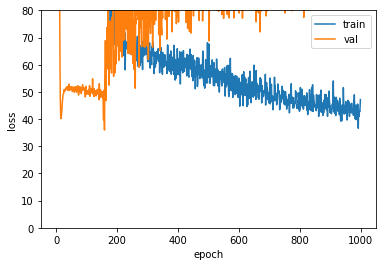

In [150]:
model = Sequential()
model.add(LSTM(260, input_shape=(3, 1), dropout = 0.2))
model.add(Dense(2,activation='relu'))
print(model.summary())

# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

# 4. 모델 학습시키기
#hist = model.fit(x_train, y_train, epochs=200, batch_size=5, validation_data=(x_val, y_val))
hist = model.fit(x_train,y_train,epochs=1000,batch_size=5,validation_split=0.2)

#학습 과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 80.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

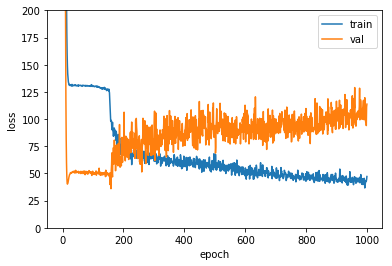

In [151]:
#학습 과정 살펴보기
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 200.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [121]:
#모델 평가
trainScore = model.evaluate(x_train, y_train, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

Train Score:  126.11053419846755
Validataion Score:  210.5945612980769
Test Score:  174.3081528634736


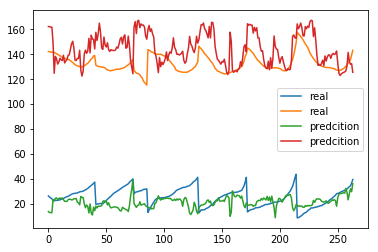

In [135]:
yhat = model.predict(x_test, verbose = 0)
#print(yhat)

plt.plot(y_test, label = "real")
plt.plot(yhat,label="predcition")
plt.legend()
plt.show()